In [57]:
import librosa
import glob
import random

from librosa import display

import scipy as sp
import numpy as np

In [38]:
import matplotlib.pyplot as plt

In [39]:
file_list = sorted(glob.glob('../resource/*.wav'))

In [41]:
file = random.choice(file_list)

In [45]:
sec = 5

fs = librosa.get_samplerate(file)

print('Sampling Rate: {}'.format(fs))

stream = librosa.core.stream(file, 1, sec * fs, sec * fs, mono=False)

# next(stream)

Sampling Rate: 16000


In [69]:
def spec2mel(img):
    return 20 * np.log(np.maximum(img, 1e-8))

In [83]:
import IPython.display as ipd
ipd.Audio(data, rate = 16000) # load a local WAV file

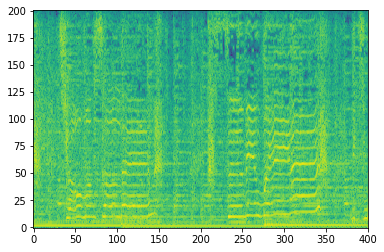

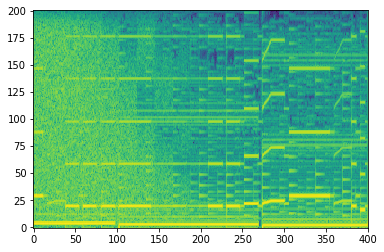

(2, 201, 401)


In [89]:
data = next(stream)

T, F, Sxx = sp.signal.stft(data, fs=16000, nperseg=400)

Zxx = np.abs(Sxx)

plt.figure()
plt.imshow(spec2mel(Zxx[0]), origin='reversed', aspect='auto')
plt.show()

plt.figure()
plt.imshow(spec2mel(Zxx[1]), origin='reversed', aspect='auto')
plt.show()

print(Sxx.shape)

In [94]:
S.shape

(201, 22786)

In [110]:
ipd.Audio([y1, y2], rate=16000)

In [111]:
ipd.Audio([data_1, data_2], rate=16000)

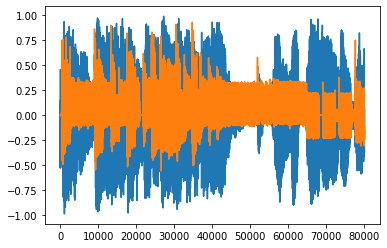

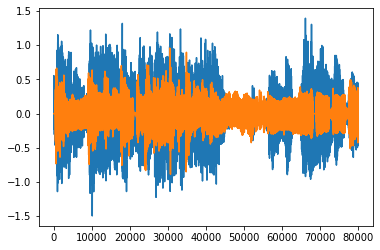

In [109]:
data = next(stream)

T, F, Sxx = sp.signal.stft(data, fs=16000, nperseg=400)

Zxx = np.abs(Sxx)

y1 = np.copy(data[0, :])
y2 = np.copy(data[1, :])

Zxx[0] = np.abs(librosa.stft(y1, n_fft=400, hop_length=200, win_length=400))
Zxx[1] = np.abs(librosa.stft(y2, n_fft=400, hop_length=200, win_length=400))


plt.figure()
plt.plot(data.T)
plt.show()


data_1 = librosa.core.griffinlim(Zxx[0], n_iter=64, win_length=400, hop_length=200)
data_2 = librosa.core.griffinlim(Zxx[1], n_iter=64, win_length=400, hop_length=200)

plt.figure()
plt.plot(data_1)
plt.plot(data_2)
plt.show()

## Highpass Filtering might help improving audio quality




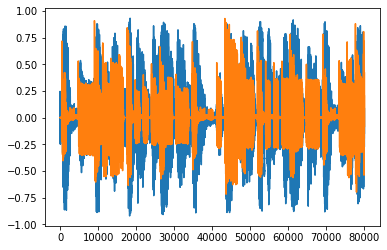

In [81]:
for i in range(1):
    data = next(stream)
    plt.figure()
    plt.plot(data.T)
    plt.show()